In [56]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.pyplot import figure

In [57]:
def loadTweet():
    twt = pd.read_csv("merged_csv_dataset_forTweet.csv")
    return twt
tweet = loadTweet()

In [58]:
def loadSlang():
    slang = pd.read_csv("slang_database.csv")
    return slang
slang = loadSlang()
print(slang)

    Abbreviations                       Text
0             lol                   laughing
1            rofl                   laughing
2             brb              be right back
3             ily                 i love you
4              ty                  thank you
..            ...                        ...
291           AYV          Are you vertical?
292           AYW                As you were
293           AYW  As you want / As you wish
294           AZN                      Asian
295           yrs                      years

[296 rows x 2 columns]


In [59]:
data_dict = slang.set_index('Abbreviations')['Text'].to_dict()

In [60]:
def implementation(tweet):
    match = 0
    tweet.lower()
    words = tweet.split()
    tweetFinal = ""
    iterator = 0
    for i in words:
        
        # Has a period
        if(i[len(i)-1] == '.'):   
            i = i[0:(len(i)-1)]
            if(data_dict.get(i) != None):
                words[iterator] = (data_dict.get(i) + ".")
            
        #Does not have a period
        elif(data_dict.get(i) != None):
            words[iterator] = data_dict.get(i)
        tweetFinal += (words[iterator] + " ")
        iterator+=1
        
    return tweetFinal

# Test Cases

In [61]:
# example of 1 sentence
oneExample = "lol dw, I will dm you."
implementation(oneExample)

'laughing dw, I will direct message you. '

In [62]:
smallExample = pd.read_csv("small_dataset_example.csv")
print(smallExample)

                                             Love it!
0   So awesome. Read my morning meditation anytime...
1   Just replaced one add with another, albeit AA ...
2   Don't bother upgrading. There is zero differen...
3   Every time I go to share the reading it pops u...
4                                    Good, simple app
5   This is a great app has too many commercials b...
6   Paid for the "Pro" and it still doesn't displa...
7   App works as intended. Sobriety date set and s...
8   Thank you I was able to get the pro. Daily ref...
9   I have Loved the Daily Reflection for over 20y...
10  All works great for me on my tablet. Had to fi...
11  Got the Pro edition hoping it would be an impr...
12  Fantastic positive daily excerpts from the boo...
13  I love this app, but my sobriety date and time...
14  Excellent for the recovering addict to b remin...
15  extremely handy to have all my morning reading...
16                                           awesome?
17                          

In [63]:
#example of small dataset
print(implementation(smallExample.to_string()))

Love it! 0 So awesome. Read my morning meditation anytime I want. Great app im glad i purchased upgraded so no commercials or advertisements. 1 Just replaced one add with another, albeit Ask about related. Couldn't get sobriety date to show. Dislike notifications not being dismissable. Refunded until fixed. Meaning "to" in SMS Don't bother upgrading. There is zero difference between free and paid. I still get ads every time I open to the meditation passage. It says you can do things like track sobriety date-doesn't. There is no "contact us" info. But they seemed to gladly take my money. 3 Every time I go to share the reading it pops up with no reading. Can you please make it so we can copy and paste it. Short for "for" in SMS Good, simple app 5 This is a great app has too many commercials but for someone like me it just teaches me strength. Absolutely great app recommend to everyone in Ask about 6 Paid for the "Pro" and it still doesn't display sobriety time. Doean't even ask for my so

# Time complexity Plot

In [64]:
from tryItABunch import tryItABunch
nValuesHash, tValuesHash = tryItABunch(implementation, startN = 148, endN = 25000, stepSize=74, numTrials=5)

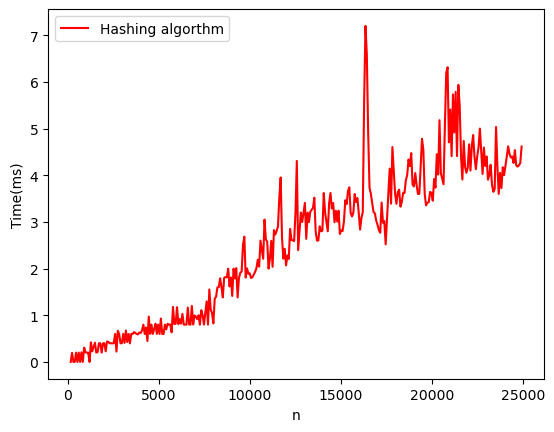

In [65]:
plt.plot(nValuesHash, tValuesHash,color="red", label="Hashing algorthm")
plt.xlabel("n")
plt.ylabel("Time(ms)")
plt.legend()

In [54]:
from tryItABunchOn import tryItABunchOn
nValuesHash2, tValuesHash2 = tryItABunchOn(numTrials=5)

Text(0.5, 1.0, 'Hashing algorithm and O(n)')

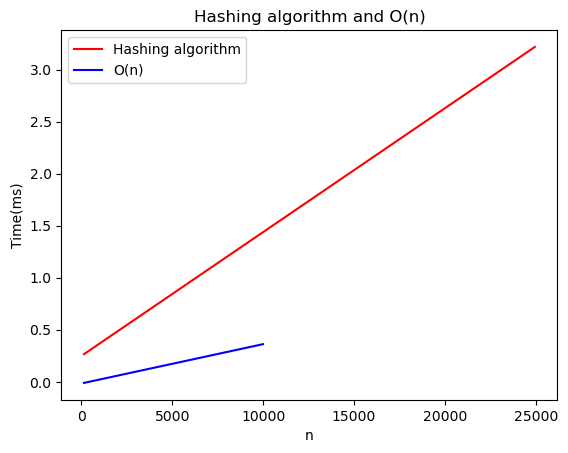

In [55]:
m, b = np.polyfit(nValuesHash, tValuesHash, 1)
nValuesHashNP = np.array(nValuesHash)

m2, b2 = np.polyfit(nValuesHash2, tValuesHash2, 1)
nValuesONP = np.array(nValuesHash2)

plt.plot(nValuesHash, m* nValuesHashNP+ b,color="red", label="Hashing algorithm")

plt.plot(nValuesHash2, m2* nValuesONP+ b2,color="blue", label="O(n)")

plt.xlabel("n")
plt.ylabel("Time(ms)")
plt.legend()
plt.title("Hashing algorithm and O(n)")